# Proyecto Integrador

## Score de Riesgo en Originación de Crédito
## Para Kubo Financiero

Participantes:

Dalina Aideé Villa Ocelotl (A01793258)

Julián Valera Juarez (A01793875)

Miguel Guillermo Galindo Orozco (A01793695)
1793695)

## Modelo XGBoost Final

### Importar librerías

In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score, accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

In [7]:
from imblearn.over_sampling import RandomOverSampler

### Leer datos

In [9]:
file_path = 'base_20210101a20240430 (2).xlsx'
df = pd.read_excel(file_path, sheet_name='Cliientes_Nuevos')
#df = pd.read_excel(file_path, sheet_name='Buro')

In [10]:
df.head(10)

,prospectus_id,Edad,Genero,EstadoCivil,DependientesEconomicos,Estado,ActividadEconomica,NivelEstudios,NumCaracteresSobreMi,consulting_date,...,MontoCredR,NumCredI,MontoCredI,NumCredM,MontoCredM,montocredito_actual,estatus_actual,diasatraso_actual,es_malo_actual,saldo_actual
0,3872,46,Hombre,Casado (sociedad conyugal),1,Ciudad de México,Empleado,Bachillerato,28,2021-09-06 15:19:27,...,14997.0,10.0,98826.0,0.0,0.0,50000,P,0,0,NaN
1,7207,43,Hombre,Soltero,0,Ciudad de México,Empleado,Maestría,113,2021-10-14 13:45:49,...,10469.0,49.0,37484.0,0.0,0.0,48000,P,0,0,NaN
2,8105,51,Mujer,Casado (sociedad conyugal),más de 4,Ciudad de México,Empresario/Socio,Licenciatura,0,2022-05-18 20:06:57,...,527690.0,1.0,113100.0,0.0,0.0,10000,P,0,0,NaN
3,9969,48,Hombre,Casado (bienes separados),1,Ciudad de México,Profesionista independiente,Licenciatura,25,2024-01-15 15:11:58,...,33826.0,1.0,50900.0,0.0,0.0,100000,V,0,0,93219.72
4,12520,53,Hombre,Casado (bienes separados),3,Baja California,Empleado,Maestría,79,2021-07-07 20:44:43,...,305643.0,1.0,253688.0,2.0,251228.0,53000,P,0,0,NaN
5,13644,37,Mujer,Soltero,1,Ciudad de México,Dueño de negocio,Licenciatura,19,2022-05-16 15:48:52,...,94413.0,10.0,80804.0,0.0,0.0,30000,P,0,0,NaN
6,17632,50,Mujer,Casado (bienes separados),0,Michoacán de Ocampo,Empleado,Licenciatura,0,2021-06-04 13:18:41,...,18859.0,9.0,385240.0,1.0,89697.0,35000,P,0,1,NaN
7,19042,31,Mujer,Casado (sociedad conyugal),0,Estado de México,Dueño de negocio,Licenciatura,0,2022-04-07 13:38:03,...,14303.0,5.0,29679.0,0.0,0.0,30000,P,0,1,NaN
8,19108,40,Hombre,Unión Libre,1,Ciudad de México,Dueño de negocio,Licenciatura,62,2022-08-25 21:30:35,...,15199.0,7.0,547893.0,0.0,0.0,15000,P,0,0,NaN
9,20073,28,Hombre,Soltero,0,Ciudad de México,Empleado,Licenciatura,0,2022-11-15 11:05:06,...,44789.0,0.0,0.0,0.0,0.0,90000,P,0,0,NaN


Leer nuevos atribitos

El código del cálculo es: 



In [12]:
atributos = pd.read_csv('atributos_calculados_2.csv')
atributos.head(5)

,index,prospectus_id,Fecha_minAp,Fecha_maxAp,Fecha_maxCr,Monto_avg,Monto_min,Monto_max,Negocios_dist,Cuentas_Banco,...,SaldoVen_sum,SaldoVen_avg,Cuentas_saldoVen,Total_pagos_vencidos,Cuentas_1Atraso,Cuentas_buenas,Cuentas_cveObs,PeorAtraso_avg,PeorAtraso_sum,PeorMOP
0,0,2666075,2017-07-29,2019-12-07,2018-10-31,5141.6,815.0,14842.0,2,2,...,0.0,0.0,0,0.0,0,5,1,0.0,0.0,0.0


In [13]:
## Unir bases

df = df.merge(atributos, how='left',on='prospectus_id')

df.head()

,prospectus_id,Edad,Genero,EstadoCivil,DependientesEconomicos,Estado,ActividadEconomica,NivelEstudios,NumCaracteresSobreMi,consulting_date,...,SaldoVen_sum,SaldoVen_avg,Cuentas_saldoVen,Total_pagos_vencidos,Cuentas_1Atraso,Cuentas_buenas,Cuentas_cveObs,PeorAtraso_avg,PeorAtraso_sum,PeorMOP
0,3872,46,Hombre,Casado (sociedad conyugal),1,Ciudad de México,Empleado,Bachillerato,28,2021-09-06 15:19:27,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,7207,43,Hombre,Soltero,0,Ciudad de México,Empleado,Maestría,113,2021-10-14 13:45:49,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,8105,51,Mujer,Casado (sociedad conyugal),más de 4,Ciudad de México,Empresario/Socio,Licenciatura,0,2022-05-18 20:06:57,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,9969,48,Hombre,Casado (bienes separados),1,Ciudad de México,Profesionista independiente,Licenciatura,25,2024-01-15 15:11:58,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,12520,53,Hombre,Casado (bienes separados),3,Baja California,Empleado,Maestría,79,2021-07-07 20:44:43,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
for i in df.columns: print(i)

prospectus_id
Edad
Genero
EstadoCivil
DependientesEconomicos
Estado
ActividadEconomica
NivelEstudios
NumCaracteresSobreMi
consulting_date
cci_score
bc_score
NumCredHist
MontoCredHist
CredMobMayor2
NumCredActivos
MontoCredActivos
NumCredR
MontoCredR
NumCredI
MontoCredI
NumCredM
MontoCredM
montocredito_actual
estatus_actual
diasatraso_actual
es_malo_actual
saldo_actual
index
Fecha_minAp
Fecha_maxAp
Fecha_maxCr
Monto_avg
Monto_min
Monto_max
Negocios_dist
Cuentas_Banco
Cuentas_micro
Cuentas_fin
Cuentas_tienda
Cuentas_com
MontoPagar_avg
MontoPagar_sum
CuentasDesde_Buro
CuentasDesde_CDC
MontoMax_avg
MontoMax_sum
Limite_avg
Limite_sum
SaldoVen_sum
SaldoVen_avg
Cuentas_saldoVen
Total_pagos_vencidos
Cuentas_1Atraso
Cuentas_buenas
Cuentas_cveObs
PeorAtraso_avg
PeorAtraso_sum
PeorMOP


In [15]:
## Calcular variables de antiguedad

#df['max_antiguedad'] = df['consulting_date'] - df['Fecha_minAp']
#df['min_antiguedad'] = df['consulting_date'] - df['Fecha_maxAp']
#df['antiguedad_ult_cierre'] = df['consulting_date'] - df['Fecha_maxCr']


Eliminar variables no necesarias

In [17]:
#variables_eliminar = ["montocredito_actual", "estatus_actual","diasatraso_actual","saldo_actual", "prospectus_id"]
variables_eliminar = ["montocredito_actual", "estatus_actual","diasatraso_actual","saldo_actual","Fecha_minAp","Fecha_maxAp","Fecha_maxCr"]
variables_ok = [i for i in df.columns if i not in variables_eliminar ]
df = df[variables_ok]
df = df[df['es_malo_actual'].isin([0,1])]
#df = df.dropna()

In [18]:
len(df)

35197

In [19]:
df.head(
    
)

,prospectus_id,Edad,Genero,EstadoCivil,DependientesEconomicos,Estado,ActividadEconomica,NivelEstudios,NumCaracteresSobreMi,consulting_date,...,SaldoVen_sum,SaldoVen_avg,Cuentas_saldoVen,Total_pagos_vencidos,Cuentas_1Atraso,Cuentas_buenas,Cuentas_cveObs,PeorAtraso_avg,PeorAtraso_sum,PeorMOP
0,3872,46,Hombre,Casado (sociedad conyugal),1,Ciudad de México,Empleado,Bachillerato,28,2021-09-06 15:19:27,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,7207,43,Hombre,Soltero,0,Ciudad de México,Empleado,Maestría,113,2021-10-14 13:45:49,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,8105,51,Mujer,Casado (sociedad conyugal),más de 4,Ciudad de México,Empresario/Socio,Licenciatura,0,2022-05-18 20:06:57,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,9969,48,Hombre,Casado (bienes separados),1,Ciudad de México,Profesionista independiente,Licenciatura,25,2024-01-15 15:11:58,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,12520,53,Hombre,Casado (bienes separados),3,Baja California,Empleado,Maestría,79,2021-07-07 20:44:43,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Eliminar registros después de Octubre 2023, ya que no cuentan con la madurez suficiente de acuerdo a lo encontrado en el EDA.

In [21]:
# Definir la fecha límite
#fecha_limite = pd.to_datetime('2023-10-01')

# Eliminar los registros que sean posteriores a la fecha límite
#df = df[df['consulting_date'] <= fecha_limite]


In [22]:
len(df)

35197

Separar variables independientes (x) y dependientes (y)

In [24]:
y = df['es_malo_actual']
X = df.drop(['es_malo_actual'], axis=1)

Eliminar columnas datetime y convertir categorias en dummy

In [26]:
X = X.select_dtypes(exclude=['datetime64'])
X = pd.get_dummies(X, drop_first=True)

Escalar datos

In [28]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Separar conjuntos de entrenamiento (train) y prueba (test)

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=1234, shuffle=True)

### Entrenamiento de modelos

In [32]:
def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_probs = model.predict_proba(X_test)[:, 1]
    auc_score = roc_auc_score(y_test, y_probs)
    acc_score = accuracy_score(y_test, y_pred)
    class_report = classification_report(y_test, y_pred, zero_division=0)
    conf_matrix = confusion_matrix(y_test, y_pred)
    
    print(f"ROC-AUC Score: {auc_score}")
    print(f"Accuracy Score: {acc_score}")
    print("Classification Report:")
    print(class_report)
    
    plt.figure(figsize=(10, 7))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Malo', 'Malo'], yticklabels=['No Malo', 'Malo'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()
    
    return auc_score, acc_score

**Balanceo de clases**

In [34]:
# Mostrar la distribución de clases antes del balanceo
print("Distribución de clases antes del balanceo:")
print(pd.Series(y_train).value_counts())


Distribución de clases antes del balanceo:
es_malo_actual
0    22510
1     5647
Name: count, dtype: int64


In [35]:
# Aplicar el sobremuestreo aleatorio
ros = RandomOverSampler(random_state=42)
X_train, y_train = ros.fit_resample(X_train, y_train)

In [36]:
# Mostrar la distribución de clases después del balanceo
print("\nDistribución de clases después del balanceo:")
print(pd.Series(y_train).value_counts())


Distribución de clases después del balanceo:
es_malo_actual
1    22510
0    22510
Name: count, dtype: int64


# Entrenar nuevos modelos desde aquí

### **Mi entrenamiento anterior de XGBoost** 

### **Por lo que ahora, buscaremos optimizar sobre ese algoritmo.** 

Lo que proponemos es aplicar una optimización del mismo conocido como **XGBoost (eXtreme Gradient Boosting)**, este algoritmo a diferencia del Gradient Boosting simple, permite optimizar en distintos hiperparámetros buscando optimizaciones globales y no sólo locales, algunos de las principales diferencias que marcan un beneficio son: 

- Regularización: Permite aplicar regularización para evitar overfitting. 
- Computo paralelizado: Permite realizar computo por batches de información.
- Se puede trabajar con información faltante (missing data)
- Tree Prunning: Realizar optimización de los árboles para encontrar mínimos globales y no sólo locales. 
- Validación Cruzada desde el entrenamiento. 


#### Librerías a utilizar

In [40]:
from sklearn.inspection import permutation_importance
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

import shap

# import packages for hyperparameters tuning
from hyperopt import STATUS_OK, Trials, fmin, hp, tpe
from hyperopt.early_stop import no_progress_loss

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [41]:
from sklearn.metrics import precision_recall_curve
#from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score


Iniciamos el espacio de búscada con rangos para encontrar los mejores parámetros para el XGBoost

In [43]:
space={ 
        'max_depth': hp.quniform("max_depth", 3, 25, 1),
        'gamma': hp.uniform ('gamma', 1,9),
        'reg_alpha' : hp.quniform('reg_alpha', 40,180,1),
        'reg_lambda' : hp.uniform('reg_lambda', 0,10),
        'colsample_bytree' : hp.uniform('colsample_bytree', 0.5,1),
        'min_child_weight' : hp.quniform('min_child_weight', 0, 15, 1),
        'n_estimators': hp.quniform('n_estimators', 2500,15000,25), 
        'scale_pos_weight': hp.quniform('scale_pos_weight', 2,15,1), # Hiperparámetro de pesos para balance de clases
        'seed': 0
    }

### Definir función objetivo para la optimización (minimización del -roc_auc)
### Optimización bayesiana (tuneada de hiperparámetros)


In [45]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score


def objective(space):
    clf=xgb.XGBClassifier(
                    n_estimators =int(space['n_estimators']), 
                    max_depth = int(space['max_depth']), gamma = space['gamma'],
                    reg_alpha = space['reg_alpha'],
                    min_child_weight=int(space['min_child_weight']),
                    scale_pos_weight=int(space['scale_pos_weight']),
                    colsample_bytree=int(space['colsample_bytree']))
    
    evaluation = [( X_train, y_train), ( X_test, y_test)]
    
    clf.fit(X_train, y_train,
            eval_set=evaluation, eval_metric="aucpr",
            early_stopping_rounds=10,verbose=False)
    

    pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, pred>0.5)
    ns_auc = roc_auc_score(y_test,  pred>0.5)
    precision = precision_score(y_test,  pred)
    recall = recall_score(y_test,  pred)
    f1 = f1_score(y_test,  pred)
    print ("Accuracy:", accuracy, " ROC_AUC:",ns_auc, "precision:", precision, "f1:",f1)
    print ("------------------------------------")
    return {'loss': -f1, 'status': STATUS_OK }

### Algoritmo de optimización

Este proceso puede ser tardado.

Eliminamos la impresión de los 500 resultados solicitados.

trials = Trials()

best_hyperparams = fmin(fn = objective,
                        space = space,
                        algo = tpe.suggest,
                        max_evals = 500,
                        trials = trials,
                        early_stop_fn = no_progress_loss(200))

In [48]:
trials = Trials()

best_hyperparams = fmin(fn = objective,
                        space = space,
                        algo = tpe.suggest,
                        max_evals = 500,
                        trials = trials,
                        early_stop_fn = no_progress_loss(200))

  0%|                                                                          | 0/500 [00:00<?, ?trial/s, best loss=?]

D:\ProgramData\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

D:\ProgramData\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



Accuracy:                                                                                                              
0.20326704545454546                                                                                                    
 ROC_AUC:                                                                                                              
0.5                                                                                                                    
precision:                                                                                                             
0.20326704545454546                                                                                                    
f1:                                                                                                                    
0.3378585763192067                                                                                                     
------------------------------------    

D:\ProgramData\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

D:\ProgramData\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



Accuracy:                                                                                                              
0.20326704545454546                                                                                                    
 ROC_AUC:                                                                                                              
0.5                                                                                                                    
precision:                                                                                                             
0.20326704545454546                                                                                                    
f1:                                                                                                                    
0.3378585763192067                                                                                                     
------------------------------------    

D:\ProgramData\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

D:\ProgramData\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



Accuracy:                                                                                                              
0.20326704545454546                                                                                                    
 ROC_AUC:                                                                                                              
0.5                                                                                                                    
precision:                                                                                                             
0.20326704545454546                                                                                                    
f1:                                                                                                                    
0.3378585763192067                                                                                                     
------------------------------------    

D:\ProgramData\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

D:\ProgramData\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



Accuracy:                                                                                                              
0.20326704545454546                                                                                                    
 ROC_AUC:                                                                                                              
0.5                                                                                                                    
precision:                                                                                                             
0.20326704545454546                                                                                                    
f1:                                                                                                                    
0.3378585763192067                                                                                                     
------------------------------------    

D:\ProgramData\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

D:\ProgramData\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



Accuracy:                                                                                                              
0.20326704545454546                                                                                                    
 ROC_AUC:                                                                                                              
0.5                                                                                                                    
precision:                                                                                                             
0.20326704545454546                                                                                                    
f1:                                                                                                                    
0.3378585763192067                                                                                                     
------------------------------------    

D:\ProgramData\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

D:\ProgramData\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



Accuracy:                                                                                                              
0.20326704545454546                                                                                                    
 ROC_AUC:                                                                                                              
0.5                                                                                                                    
precision:                                                                                                             
0.20326704545454546                                                                                                    
f1:                                                                                                                    
0.3378585763192067                                                                                                     
------------------------------------    

D:\ProgramData\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

D:\ProgramData\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



Accuracy:                                                                                                              
0.20326704545454546                                                                                                    
 ROC_AUC:                                                                                                              
0.5                                                                                                                    
precision:                                                                                                             
0.20326704545454546                                                                                                    
f1:                                                                                                                    
0.3378585763192067                                                                                                     
------------------------------------    

D:\ProgramData\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

D:\ProgramData\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



Accuracy:                                                                                                              
0.20326704545454546                                                                                                    
 ROC_AUC:                                                                                                              
0.5                                                                                                                    
precision:                                                                                                             
0.20326704545454546                                                                                                    
f1:                                                                                                                    
0.3378585763192067                                                                                                     
------------------------------------    

D:\ProgramData\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

D:\ProgramData\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



Accuracy:                                                                                                              
0.20326704545454546                                                                                                    
 ROC_AUC:                                                                                                              
0.5                                                                                                                    
precision:                                                                                                             
0.20326704545454546                                                                                                    
f1:                                                                                                                    
0.3378585763192067                                                                                                     
------------------------------------    

D:\ProgramData\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

D:\ProgramData\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



Accuracy:                                                                                                              
0.20326704545454546                                                                                                    
 ROC_AUC:                                                                                                              
0.5                                                                                                                    
precision:                                                                                                             
0.20326704545454546                                                                                                    
f1:                                                                                                                    
0.3378585763192067                                                                                                     
------------------------------------    

D:\ProgramData\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

D:\ProgramData\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



Accuracy:                                                                                                              
0.20326704545454546                                                                                                    
 ROC_AUC:                                                                                                              
0.5                                                                                                                    
precision:                                                                                                             
0.20326704545454546                                                                                                    
f1:                                                                                                                    
0.3378585763192067                                                                                                     
------------------------------------    

D:\ProgramData\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

D:\ProgramData\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



Accuracy:                                                                                                              
0.20326704545454546                                                                                                    
 ROC_AUC:                                                                                                              
0.5                                                                                                                    
precision:                                                                                                             
0.20326704545454546                                                                                                    
f1:                                                                                                                    
0.3378585763192067                                                                                                     
------------------------------------    

D:\ProgramData\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

D:\ProgramData\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



Accuracy:                                                                                                              
0.20326704545454546                                                                                                    
 ROC_AUC:                                                                                                              
0.5                                                                                                                    
precision:                                                                                                             
0.20326704545454546                                                                                                    
f1:                                                                                                                    
0.3378585763192067                                                                                                     
------------------------------------    

D:\ProgramData\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

D:\ProgramData\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



Accuracy:                                                                                                              
0.20326704545454546                                                                                                    
 ROC_AUC:                                                                                                              
0.5                                                                                                                    
precision:                                                                                                             
0.20326704545454546                                                                                                    
f1:                                                                                                                    
0.3378585763192067                                                                                                     
------------------------------------    

D:\ProgramData\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

D:\ProgramData\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



Accuracy:                                                                                                              
0.20326704545454546                                                                                                    
 ROC_AUC:                                                                                                              
0.5                                                                                                                    
precision:                                                                                                             
0.20326704545454546                                                                                                    
f1:                                                                                                                    
0.3378585763192067                                                                                                     
------------------------------------    

D:\ProgramData\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

D:\ProgramData\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



Accuracy:                                                                                                              
0.20326704545454546                                                                                                    
 ROC_AUC:                                                                                                              
0.5                                                                                                                    
precision:                                                                                                             
0.20326704545454546                                                                                                    
f1:                                                                                                                    
0.3378585763192067                                                                                                     
------------------------------------    

D:\ProgramData\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

D:\ProgramData\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



Accuracy:                                                                                                              
0.20326704545454546                                                                                                    
 ROC_AUC:                                                                                                              
0.5                                                                                                                    
precision:                                                                                                             
0.20326704545454546                                                                                                    
f1:                                                                                                                    
0.3378585763192067                                                                                                     
------------------------------------    

D:\ProgramData\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

D:\ProgramData\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



Accuracy:                                                                                                              
0.20326704545454546                                                                                                    
 ROC_AUC:                                                                                                              
0.5                                                                                                                    
precision:                                                                                                             
0.20326704545454546                                                                                                    
f1:                                                                                                                    
0.3378585763192067                                                                                                     
------------------------------------    

D:\ProgramData\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

D:\ProgramData\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



Accuracy:                                                                                                              
0.20326704545454546                                                                                                    
 ROC_AUC:                                                                                                              
0.5                                                                                                                    
precision:                                                                                                             
0.20326704545454546                                                                                                    
f1:                                                                                                                    
0.3378585763192067                                                                                                     
------------------------------------    

D:\ProgramData\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

D:\ProgramData\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



Accuracy:                                                                                                              
0.20326704545454546                                                                                                    
 ROC_AUC:                                                                                                              
0.5                                                                                                                    
precision:                                                                                                             
0.20326704545454546                                                                                                    
f1:                                                                                                                    
0.3378585763192067                                                                                                     
------------------------------------    

D:\ProgramData\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

D:\ProgramData\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



Accuracy:                                                                                                              
0.20326704545454546                                                                                                    
 ROC_AUC:                                                                                                              
0.5                                                                                                                    
precision:                                                                                                             
0.20326704545454546                                                                                                    
f1:                                                                                                                    
0.3378585763192067                                                                                                     
------------------------------------    

D:\ProgramData\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

D:\ProgramData\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



Accuracy:                                                                                                              
0.20326704545454546                                                                                                    
 ROC_AUC:                                                                                                              
0.5                                                                                                                    
precision:                                                                                                             
0.20326704545454546                                                                                                    
f1:                                                                                                                    
0.3378585763192067                                                                                                     
------------------------------------    

D:\ProgramData\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

D:\ProgramData\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



Accuracy:                                                                                                              
0.20326704545454546                                                                                                    
 ROC_AUC:                                                                                                              
0.5                                                                                                                    
precision:                                                                                                             
0.20326704545454546                                                                                                    
f1:                                                                                                                    
0.3378585763192067                                                                                                     
------------------------------------    

D:\ProgramData\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

D:\ProgramData\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



Accuracy:                                                                                                              
0.20326704545454546                                                                                                    
 ROC_AUC:                                                                                                              
0.5                                                                                                                    
precision:                                                                                                             
0.20326704545454546                                                                                                    
f1:                                                                                                                    
0.3378585763192067                                                                                                     
------------------------------------    

D:\ProgramData\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

D:\ProgramData\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



Accuracy:                                                                                                              
0.20326704545454546                                                                                                    
 ROC_AUC:                                                                                                              
0.5                                                                                                                    
precision:                                                                                                             
0.20326704545454546                                                                                                    
f1:                                                                                                                    
0.3378585763192067                                                                                                     
------------------------------------    

D:\ProgramData\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

D:\ProgramData\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



Accuracy:                                                                                                              
0.20326704545454546                                                                                                    
 ROC_AUC:                                                                                                              
0.5                                                                                                                    
precision:                                                                                                             
0.20326704545454546                                                                                                    
f1:                                                                                                                    
0.3378585763192067                                                                                                     
------------------------------------    

D:\ProgramData\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

D:\ProgramData\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



Accuracy:                                                                                                              
0.20326704545454546                                                                                                    
 ROC_AUC:                                                                                                              
0.5                                                                                                                    
precision:                                                                                                             
0.20326704545454546                                                                                                    
f1:                                                                                                                    
0.3378585763192067                                                                                                     
------------------------------------    

D:\ProgramData\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

D:\ProgramData\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



Accuracy:                                                                                                              
0.20326704545454546                                                                                                    
 ROC_AUC:                                                                                                              
0.5                                                                                                                    
precision:                                                                                                             
0.20326704545454546                                                                                                    
f1:                                                                                                                    
0.3378585763192067                                                                                                     
------------------------------------    

D:\ProgramData\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

D:\ProgramData\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



Accuracy:                                                                                                              
0.20326704545454546                                                                                                    
 ROC_AUC:                                                                                                              
0.5                                                                                                                    
precision:                                                                                                             
0.20326704545454546                                                                                                    
f1:                                                                                                                    
0.3378585763192067                                                                                                     
------------------------------------    

D:\ProgramData\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

D:\ProgramData\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



Accuracy:                                                                                                              
0.20326704545454546                                                                                                    
 ROC_AUC:                                                                                                              
0.5                                                                                                                    
precision:                                                                                                             
0.20326704545454546                                                                                                    
f1:                                                                                                                    
0.3378585763192067                                                                                                     
------------------------------------    

D:\ProgramData\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

D:\ProgramData\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



Accuracy:                                                                                                              
0.20326704545454546                                                                                                    
 ROC_AUC:                                                                                                              
0.5                                                                                                                    
precision:                                                                                                             
0.20326704545454546                                                                                                    
f1:                                                                                                                    
0.3378585763192067                                                                                                     
------------------------------------    

D:\ProgramData\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

D:\ProgramData\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



Accuracy:                                                                                                              
0.20326704545454546                                                                                                    
 ROC_AUC:                                                                                                              
0.5                                                                                                                    
precision:                                                                                                             
0.20326704545454546                                                                                                    
f1:                                                                                                                    
0.3378585763192067                                                                                                     
------------------------------------    

D:\ProgramData\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

D:\ProgramData\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



Accuracy:                                                                                                              
0.20326704545454546                                                                                                    
 ROC_AUC:                                                                                                              
0.5                                                                                                                    
precision:                                                                                                             
0.20326704545454546                                                                                                    
f1:                                                                                                                    
0.3378585763192067                                                                                                     
------------------------------------    

D:\ProgramData\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

D:\ProgramData\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



Accuracy:                                                                                                              
0.20326704545454546                                                                                                    
 ROC_AUC:                                                                                                              
0.5                                                                                                                    
precision:                                                                                                             
0.20326704545454546                                                                                                    
f1:                                                                                                                    
0.3378585763192067                                                                                                     
------------------------------------    

D:\ProgramData\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

D:\ProgramData\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



Accuracy:                                                                                                              
0.20326704545454546                                                                                                    
 ROC_AUC:                                                                                                              
0.5                                                                                                                    
precision:                                                                                                             
0.20326704545454546                                                                                                    
f1:                                                                                                                    
0.3378585763192067                                                                                                     
------------------------------------    

D:\ProgramData\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

D:\ProgramData\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



Accuracy:                                                                                                              
0.20326704545454546                                                                                                    
 ROC_AUC:                                                                                                              
0.5                                                                                                                    
precision:                                                                                                             
0.20326704545454546                                                                                                    
f1:                                                                                                                    
0.3378585763192067                                                                                                     
------------------------------------    

D:\ProgramData\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

D:\ProgramData\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



Accuracy:                                                                                                              
0.20326704545454546                                                                                                    
 ROC_AUC:                                                                                                              
0.5                                                                                                                    
precision:                                                                                                             
0.20326704545454546                                                                                                    
f1:                                                                                                                    
0.3378585763192067                                                                                                     
------------------------------------    

D:\ProgramData\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

D:\ProgramData\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



Accuracy:                                                                                                              
0.20326704545454546                                                                                                    
 ROC_AUC:                                                                                                              
0.5                                                                                                                    
precision:                                                                                                             
0.20326704545454546                                                                                                    
f1:                                                                                                                    
0.3378585763192067                                                                                                     
------------------------------------    

D:\ProgramData\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

D:\ProgramData\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



Accuracy:                                                                                                              
0.20326704545454546                                                                                                    
 ROC_AUC:                                                                                                              
0.5                                                                                                                    
precision:                                                                                                             
0.20326704545454546                                                                                                    
f1:                                                                                                                    
0.3378585763192067                                                                                                     
------------------------------------    

D:\ProgramData\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

D:\ProgramData\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



Accuracy:                                                                                                              
0.20326704545454546                                                                                                    
 ROC_AUC:                                                                                                              
0.5                                                                                                                    
precision:                                                                                                             
0.20326704545454546                                                                                                    
f1:                                                                                                                    
0.3378585763192067                                                                                                     
------------------------------------    

D:\ProgramData\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

D:\ProgramData\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



Accuracy:                                                                                                              
0.20326704545454546                                                                                                    
 ROC_AUC:                                                                                                              
0.5                                                                                                                    
precision:                                                                                                             
0.20326704545454546                                                                                                    
f1:                                                                                                                    
0.3378585763192067                                                                                                     
------------------------------------    

D:\ProgramData\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

D:\ProgramData\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



Accuracy:                                                                                                              
0.20326704545454546                                                                                                    
 ROC_AUC:                                                                                                              
0.5                                                                                                                    
precision:                                                                                                             
0.20326704545454546                                                                                                    
f1:                                                                                                                    
0.3378585763192067                                                                                                     
------------------------------------    

D:\ProgramData\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

D:\ProgramData\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



Accuracy:                                                                                                              
0.20326704545454546                                                                                                    
 ROC_AUC:                                                                                                              
0.5                                                                                                                    
precision:                                                                                                             
0.20326704545454546                                                                                                    
f1:                                                                                                                    
0.3378585763192067                                                                                                     
------------------------------------    

D:\ProgramData\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

D:\ProgramData\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



Accuracy:                                                                                                              
0.20326704545454546                                                                                                    
 ROC_AUC:                                                                                                              
0.5                                                                                                                    
precision:                                                                                                             
0.20326704545454546                                                                                                    
f1:                                                                                                                    
0.3378585763192067                                                                                                     
------------------------------------    

D:\ProgramData\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

D:\ProgramData\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



Accuracy:                                                                                                              
0.20326704545454546                                                                                                    
 ROC_AUC:                                                                                                              
0.5                                                                                                                    
precision:                                                                                                             
0.20326704545454546                                                                                                    
f1:                                                                                                                    
0.3378585763192067                                                                                                     
------------------------------------    

D:\ProgramData\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

D:\ProgramData\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



Accuracy:                                                                                                              
0.20326704545454546                                                                                                    
 ROC_AUC:                                                                                                              
0.5                                                                                                                    
precision:                                                                                                             
0.20326704545454546                                                                                                    
f1:                                                                                                                    
0.3378585763192067                                                                                                     
------------------------------------    

D:\ProgramData\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

D:\ProgramData\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



Accuracy:                                                                                                              
0.20326704545454546                                                                                                    
 ROC_AUC:                                                                                                              
0.5                                                                                                                    
precision:                                                                                                             
0.20326704545454546                                                                                                    
f1:                                                                                                                    
0.3378585763192067                                                                                                     
------------------------------------    

D:\ProgramData\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

D:\ProgramData\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



Accuracy:                                                                                                              
0.20326704545454546                                                                                                    
 ROC_AUC:                                                                                                              
0.5                                                                                                                    
precision:                                                                                                             
0.20326704545454546                                                                                                    
f1:                                                                                                                    
0.3378585763192067                                                                                                     
------------------------------------    

D:\ProgramData\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

D:\ProgramData\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



Accuracy:                                                                                                              
0.20326704545454546                                                                                                    
 ROC_AUC:                                                                                                              
0.5                                                                                                                    
precision:                                                                                                             
0.20326704545454546                                                                                                    
f1:                                                                                                                    
0.3378585763192067                                                                                                     
------------------------------------    

D:\ProgramData\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

D:\ProgramData\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



Accuracy:                                                                                                              
0.20326704545454546                                                                                                    
 ROC_AUC:                                                                                                              
0.5                                                                                                                    
precision:                                                                                                             
0.20326704545454546                                                                                                    
f1:                                                                                                                    
0.3378585763192067                                                                                                     
------------------------------------    

D:\ProgramData\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

D:\ProgramData\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



Accuracy:                                                                                                              
0.20326704545454546                                                                                                    
 ROC_AUC:                                                                                                              
0.5                                                                                                                    
precision:                                                                                                             
0.20326704545454546                                                                                                    
f1:                                                                                                                    
0.3378585763192067                                                                                                     
------------------------------------    

D:\ProgramData\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

D:\ProgramData\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



Accuracy:                                                                                                              
0.20326704545454546                                                                                                    
 ROC_AUC:                                                                                                              
0.5                                                                                                                    
precision:                                                                                                             
0.20326704545454546                                                                                                    
f1:                                                                                                                    
0.3378585763192067                                                                                                     
------------------------------------    

D:\ProgramData\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

D:\ProgramData\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



Accuracy:                                                                                                              
0.20326704545454546                                                                                                    
 ROC_AUC:                                                                                                              
0.5                                                                                                                    
precision:                                                                                                             
0.20326704545454546                                                                                                    
f1:                                                                                                                    
0.3378585763192067                                                                                                     
------------------------------------    

D:\ProgramData\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

D:\ProgramData\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



Accuracy:                                                                                                              
0.20326704545454546                                                                                                    
 ROC_AUC:                                                                                                              
0.5                                                                                                                    
precision:                                                                                                             
0.20326704545454546                                                                                                    
f1:                                                                                                                    
0.3378585763192067                                                                                                     
------------------------------------    

D:\ProgramData\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

D:\ProgramData\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



Accuracy:                                                                                                              
0.20326704545454546                                                                                                    
 ROC_AUC:                                                                                                              
0.5                                                                                                                    
precision:                                                                                                             
0.20326704545454546                                                                                                    
f1:                                                                                                                    
0.3378585763192067                                                                                                     
------------------------------------    

D:\ProgramData\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

D:\ProgramData\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



Accuracy:                                                                                                              
0.20326704545454546                                                                                                    
 ROC_AUC:                                                                                                              
0.5                                                                                                                    
precision:                                                                                                             
0.20326704545454546                                                                                                    
f1:                                                                                                                    
0.3378585763192067                                                                                                     
------------------------------------    

D:\ProgramData\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

D:\ProgramData\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



Accuracy:                                                                                                              
0.20326704545454546                                                                                                    
 ROC_AUC:                                                                                                              
0.5                                                                                                                    
precision:                                                                                                             
0.20326704545454546                                                                                                    
f1:                                                                                                                    
0.3378585763192067                                                                                                     
------------------------------------    

D:\ProgramData\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

D:\ProgramData\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



Accuracy:                                                                                                              
0.20326704545454546                                                                                                    
 ROC_AUC:                                                                                                              
0.5                                                                                                                    
precision:                                                                                                             
0.20326704545454546                                                                                                    
f1:                                                                                                                    
0.3378585763192067                                                                                                     
------------------------------------    

D:\ProgramData\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

D:\ProgramData\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



Accuracy:                                                                                                              
0.20326704545454546                                                                                                    
 ROC_AUC:                                                                                                              
0.5                                                                                                                    
precision:                                                                                                             
0.20326704545454546                                                                                                    
f1:                                                                                                                    
0.3378585763192067                                                                                                     
------------------------------------    

D:\ProgramData\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

D:\ProgramData\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



Accuracy:                                                                                                              
0.20326704545454546                                                                                                    
 ROC_AUC:                                                                                                              
0.5                                                                                                                    
precision:                                                                                                             
0.20326704545454546                                                                                                    
f1:                                                                                                                    
0.3378585763192067                                                                                                     
------------------------------------    

D:\ProgramData\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

D:\ProgramData\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



Accuracy:                                                                                                              
0.20326704545454546                                                                                                    
 ROC_AUC:                                                                                                              
0.5                                                                                                                    
precision:                                                                                                             
0.20326704545454546                                                                                                    
f1:                                                                                                                    
0.3378585763192067                                                                                                     
------------------------------------    

D:\ProgramData\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

D:\ProgramData\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



Accuracy:                                                                                                              
0.20326704545454546                                                                                                    
 ROC_AUC:                                                                                                              
0.5                                                                                                                    
precision:                                                                                                             
0.20326704545454546                                                                                                    
f1:                                                                                                                    
0.3378585763192067                                                                                                     
------------------------------------    

D:\ProgramData\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

D:\ProgramData\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



Accuracy:                                                                                                              
0.20326704545454546                                                                                                    
 ROC_AUC:                                                                                                              
0.5                                                                                                                    
precision:                                                                                                             
0.20326704545454546                                                                                                    
f1:                                                                                                                    
0.3378585763192067                                                                                                     
------------------------------------    

D:\ProgramData\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

D:\ProgramData\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



Accuracy:                                                                                                              
0.20326704545454546                                                                                                    
 ROC_AUC:                                                                                                              
0.5                                                                                                                    
precision:                                                                                                             
0.20326704545454546                                                                                                    
f1:                                                                                                                    
0.3378585763192067                                                                                                     
------------------------------------    

D:\ProgramData\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

D:\ProgramData\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



Accuracy:                                                                                                              
0.20326704545454546                                                                                                    
 ROC_AUC:                                                                                                              
0.5                                                                                                                    
precision:                                                                                                             
0.20326704545454546                                                                                                    
f1:                                                                                                                    
0.3378585763192067                                                                                                     
------------------------------------    

D:\ProgramData\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

D:\ProgramData\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



Accuracy:                                                                                                              
0.20326704545454546                                                                                                    
 ROC_AUC:                                                                                                              
0.5                                                                                                                    
precision:                                                                                                             
0.20326704545454546                                                                                                    
f1:                                                                                                                    
0.3378585763192067                                                                                                     
------------------------------------    

D:\ProgramData\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

D:\ProgramData\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



Accuracy:                                                                                                              
0.20326704545454546                                                                                                    
 ROC_AUC:                                                                                                              
0.5                                                                                                                    
precision:                                                                                                             
0.20326704545454546                                                                                                    
f1:                                                                                                                    
0.3378585763192067                                                                                                     
------------------------------------    

D:\ProgramData\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

D:\ProgramData\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



Accuracy:                                                                                                              
0.20326704545454546                                                                                                    
 ROC_AUC:                                                                                                              
0.5                                                                                                                    
precision:                                                                                                             
0.20326704545454546                                                                                                    
f1:                                                                                                                    
0.3378585763192067                                                                                                     
------------------------------------    

D:\ProgramData\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

D:\ProgramData\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



Accuracy:                                                                                                              
0.20326704545454546                                                                                                    
 ROC_AUC:                                                                                                              
0.5                                                                                                                    
precision:                                                                                                             
0.20326704545454546                                                                                                    
f1:                                                                                                                    
0.3378585763192067                                                                                                     
------------------------------------    

D:\ProgramData\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

D:\ProgramData\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



Accuracy:                                                                                                              
0.20326704545454546                                                                                                    
 ROC_AUC:                                                                                                              
0.5                                                                                                                    
precision:                                                                                                             
0.20326704545454546                                                                                                    
f1:                                                                                                                    
0.3378585763192067                                                                                                     
------------------------------------    

D:\ProgramData\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

D:\ProgramData\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



Accuracy:                                                                                                              
0.20326704545454546                                                                                                    
 ROC_AUC:                                                                                                              
0.5                                                                                                                    
precision:                                                                                                             
0.20326704545454546                                                                                                    
f1:                                                                                                                    
0.3378585763192067                                                                                                     
------------------------------------    

D:\ProgramData\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

D:\ProgramData\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



Accuracy:                                                                                                              
0.20326704545454546                                                                                                    
 ROC_AUC:                                                                                                              
0.5                                                                                                                    
precision:                                                                                                             
0.20326704545454546                                                                                                    
f1:                                                                                                                    
0.3378585763192067                                                                                                     
------------------------------------    

D:\ProgramData\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

D:\ProgramData\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



Accuracy:                                                                                                              
0.20326704545454546                                                                                                    
 ROC_AUC:                                                                                                              
0.5                                                                                                                    
precision:                                                                                                             
0.20326704545454546                                                                                                    
f1:                                                                                                                    
0.3378585763192067                                                                                                     
------------------------------------    

D:\ProgramData\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

D:\ProgramData\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



Accuracy:                                                                                                              
0.20326704545454546                                                                                                    
 ROC_AUC:                                                                                                              
0.5                                                                                                                    
precision:                                                                                                             
0.20326704545454546                                                                                                    
f1:                                                                                                                    
0.3378585763192067                                                                                                     
------------------------------------    

D:\ProgramData\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

D:\ProgramData\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



Accuracy:                                                                                                              
0.20326704545454546                                                                                                    
 ROC_AUC:                                                                                                              
0.5                                                                                                                    
precision:                                                                                                             
0.20326704545454546                                                                                                    
f1:                                                                                                                    
0.3378585763192067                                                                                                     
------------------------------------    

D:\ProgramData\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

D:\ProgramData\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



Accuracy:                                                                                                              
0.20326704545454546                                                                                                    
 ROC_AUC:                                                                                                              
0.5                                                                                                                    
precision:                                                                                                             
0.20326704545454546                                                                                                    
f1:                                                                                                                    
0.3378585763192067                                                                                                     
------------------------------------    

D:\ProgramData\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

D:\ProgramData\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



Accuracy:                                                                                                              
0.20326704545454546                                                                                                    
 ROC_AUC:                                                                                                              
0.5                                                                                                                    
precision:                                                                                                             
0.20326704545454546                                                                                                    
f1:                                                                                                                    
0.3378585763192067                                                                                                     
------------------------------------    

D:\ProgramData\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

D:\ProgramData\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



Accuracy:                                                                                                              
0.20326704545454546                                                                                                    
 ROC_AUC:                                                                                                              
0.5                                                                                                                    
precision:                                                                                                             
0.20326704545454546                                                                                                    
f1:                                                                                                                    
0.3378585763192067                                                                                                     
------------------------------------    

D:\ProgramData\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

D:\ProgramData\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



Accuracy:                                                                                                              
0.20326704545454546                                                                                                    
 ROC_AUC:                                                                                                              
0.5                                                                                                                    
precision:                                                                                                             
0.20326704545454546                                                                                                    
f1:                                                                                                                    
0.3378585763192067                                                                                                     
------------------------------------    

D:\ProgramData\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

D:\ProgramData\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



Accuracy:                                                                                                              
0.20326704545454546                                                                                                    
 ROC_AUC:                                                                                                              
0.5                                                                                                                    
precision:                                                                                                             
0.20326704545454546                                                                                                    
f1:                                                                                                                    
0.3378585763192067                                                                                                     
------------------------------------    

D:\ProgramData\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

D:\ProgramData\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



Accuracy:                                                                                                              
0.20326704545454546                                                                                                    
 ROC_AUC:                                                                                                              
0.5                                                                                                                    
precision:                                                                                                             
0.20326704545454546                                                                                                    
f1:                                                                                                                    
0.3378585763192067                                                                                                     
------------------------------------    

D:\ProgramData\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

D:\ProgramData\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



Accuracy:                                                                                                              
0.20326704545454546                                                                                                    
 ROC_AUC:                                                                                                              
0.5                                                                                                                    
precision:                                                                                                             
0.20326704545454546                                                                                                    
f1:                                                                                                                    
0.3378585763192067                                                                                                     
------------------------------------    

D:\ProgramData\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

D:\ProgramData\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



Accuracy:                                                                                                              
0.20326704545454546                                                                                                    
 ROC_AUC:                                                                                                              
0.5                                                                                                                    
precision:                                                                                                             
0.20326704545454546                                                                                                    
f1:                                                                                                                    
0.3378585763192067                                                                                                     
------------------------------------    

D:\ProgramData\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

D:\ProgramData\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



Accuracy:                                                                                                              
0.20326704545454546                                                                                                    
 ROC_AUC:                                                                                                              
0.5                                                                                                                    
precision:                                                                                                             
0.20326704545454546                                                                                                    
f1:                                                                                                                    
0.3378585763192067                                                                                                     
------------------------------------    

D:\ProgramData\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

D:\ProgramData\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



Accuracy:                                                                                                              
0.20326704545454546                                                                                                    
 ROC_AUC:                                                                                                              
0.5                                                                                                                    
precision:                                                                                                             
0.20326704545454546                                                                                                    
f1:                                                                                                                    
0.3378585763192067                                                                                                     
------------------------------------    

D:\ProgramData\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

D:\ProgramData\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



Accuracy:                                                                                                              
0.20326704545454546                                                                                                    
 ROC_AUC:                                                                                                              
0.5                                                                                                                    
precision:                                                                                                             
0.20326704545454546                                                                                                    
f1:                                                                                                                    
0.3378585763192067                                                                                                     
------------------------------------    

D:\ProgramData\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

D:\ProgramData\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



Accuracy:                                                                                                              
0.20326704545454546                                                                                                    
 ROC_AUC:                                                                                                              
0.5                                                                                                                    
precision:                                                                                                             
0.20326704545454546                                                                                                    
f1:                                                                                                                    
0.3378585763192067                                                                                                     
------------------------------------    

D:\ProgramData\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

D:\ProgramData\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



Accuracy:                                                                                                              
0.20326704545454546                                                                                                    
 ROC_AUC:                                                                                                              
0.5                                                                                                                    
precision:                                                                                                             
0.20326704545454546                                                                                                    
f1:                                                                                                                    
0.3378585763192067                                                                                                     
------------------------------------    

D:\ProgramData\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

D:\ProgramData\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



Accuracy:                                                                                                              
0.20326704545454546                                                                                                    
 ROC_AUC:                                                                                                              
0.5                                                                                                                    
precision:                                                                                                             
0.20326704545454546                                                                                                    
f1:                                                                                                                    
0.3378585763192067                                                                                                     
------------------------------------    

D:\ProgramData\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

D:\ProgramData\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



Accuracy:                                                                                                              
0.20326704545454546                                                                                                    
 ROC_AUC:                                                                                                              
0.5                                                                                                                    
precision:                                                                                                             
0.20326704545454546                                                                                                    
f1:                                                                                                                    
0.3378585763192067                                                                                                     
------------------------------------    

D:\ProgramData\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

D:\ProgramData\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



Accuracy:                                                                                                              
0.20326704545454546                                                                                                    
 ROC_AUC:                                                                                                              
0.5                                                                                                                    
precision:                                                                                                             
0.20326704545454546                                                                                                    
f1:                                                                                                                    
0.3378585763192067                                                                                                     
------------------------------------    

D:\ProgramData\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

D:\ProgramData\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



Accuracy:                                                                                                              
0.20326704545454546                                                                                                    
 ROC_AUC:                                                                                                              
0.5                                                                                                                    
precision:                                                                                                             
0.20326704545454546                                                                                                    
f1:                                                                                                                    
0.3378585763192067                                                                                                     
------------------------------------    

D:\ProgramData\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

D:\ProgramData\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



Accuracy:                                                                                                              
0.20326704545454546                                                                                                    
 ROC_AUC:                                                                                                              
0.5                                                                                                                    
precision:                                                                                                             
0.20326704545454546                                                                                                    
f1:                                                                                                                    
0.3378585763192067                                                                                                     
------------------------------------    

D:\ProgramData\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

D:\ProgramData\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



Accuracy:                                                                                                              
0.20326704545454546                                                                                                    
 ROC_AUC:                                                                                                              
0.5                                                                                                                    
precision:                                                                                                             
0.20326704545454546                                                                                                    
f1:                                                                                                                    
0.3378585763192067                                                                                                     
------------------------------------    

D:\ProgramData\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

D:\ProgramData\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



Accuracy:                                                                                                              
0.20326704545454546                                                                                                    
 ROC_AUC:                                                                                                              
0.5                                                                                                                    
precision:                                                                                                             
0.20326704545454546                                                                                                    
f1:                                                                                                                    
0.3378585763192067                                                                                                     
------------------------------------    

D:\ProgramData\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

D:\ProgramData\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



Accuracy:                                                                                                              
0.20326704545454546                                                                                                    
 ROC_AUC:                                                                                                              
0.5                                                                                                                    
precision:                                                                                                             
0.20326704545454546                                                                                                    
f1:                                                                                                                    
0.3378585763192067                                                                                                     
------------------------------------    

D:\ProgramData\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

D:\ProgramData\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



Accuracy:                                                                                                              
0.20326704545454546                                                                                                    
 ROC_AUC:                                                                                                              
0.5                                                                                                                    
precision:                                                                                                             
0.20326704545454546                                                                                                    
f1:                                                                                                                    
0.3378585763192067                                                                                                     
------------------------------------    

D:\ProgramData\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

D:\ProgramData\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



Accuracy:                                                                                                              
0.20326704545454546                                                                                                    
 ROC_AUC:                                                                                                              
0.5                                                                                                                    
precision:                                                                                                             
0.20326704545454546                                                                                                    
f1:                                                                                                                    
0.3378585763192067                                                                                                     
------------------------------------    

D:\ProgramData\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

D:\ProgramData\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



Accuracy:                                                                                                              
0.20326704545454546                                                                                                    
 ROC_AUC:                                                                                                              
0.5                                                                                                                    
precision:                                                                                                             
0.20326704545454546                                                                                                    
f1:                                                                                                                    
0.3378585763192067                                                                                                     
------------------------------------    

D:\ProgramData\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

D:\ProgramData\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



Accuracy:                                                                                                              
0.20326704545454546                                                                                                    
 ROC_AUC:                                                                                                              
0.5                                                                                                                    
precision:                                                                                                             
0.20326704545454546                                                                                                    
f1:                                                                                                                    
0.3378585763192067                                                                                                     
------------------------------------    

D:\ProgramData\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

D:\ProgramData\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



Accuracy:                                                                                                              
0.20326704545454546                                                                                                    
 ROC_AUC:                                                                                                              
0.5                                                                                                                    
precision:                                                                                                             
0.20326704545454546                                                                                                    
f1:                                                                                                                    
0.3378585763192067                                                                                                     
------------------------------------    

D:\ProgramData\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

D:\ProgramData\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



Accuracy:                                                                                                              
0.20326704545454546                                                                                                    
 ROC_AUC:                                                                                                              
0.5                                                                                                                    
precision:                                                                                                             
0.20326704545454546                                                                                                    
f1:                                                                                                                    
0.3378585763192067                                                                                                     
------------------------------------    

D:\ProgramData\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

D:\ProgramData\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



Accuracy:                                                                                                              
0.20326704545454546                                                                                                    
 ROC_AUC:                                                                                                              
0.5                                                                                                                    
precision:                                                                                                             
0.20326704545454546                                                                                                    
f1:                                                                                                                    
0.3378585763192067                                                                                                     
------------------------------------    

D:\ProgramData\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

D:\ProgramData\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



Accuracy:                                                                                                              
0.20326704545454546                                                                                                    
 ROC_AUC:                                                                                                              
0.5                                                                                                                    
precision:                                                                                                             
0.20326704545454546                                                                                                    
f1:                                                                                                                    
0.3378585763192067                                                                                                     
------------------------------------    

D:\ProgramData\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

D:\ProgramData\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



Accuracy:                                                                                                              
0.20326704545454546                                                                                                    
 ROC_AUC:                                                                                                              
0.5                                                                                                                    
precision:                                                                                                             
0.20326704545454546                                                                                                    
f1:                                                                                                                    
0.3378585763192067                                                                                                     
------------------------------------    

D:\ProgramData\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

D:\ProgramData\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



Accuracy:                                                                                                              
0.20326704545454546                                                                                                    
 ROC_AUC:                                                                                                              
0.5                                                                                                                    
precision:                                                                                                             
0.20326704545454546                                                                                                    
f1:                                                                                                                    
0.3378585763192067                                                                                                     
------------------------------------    

D:\ProgramData\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

D:\ProgramData\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



Accuracy:                                                                                                              
0.20326704545454546                                                                                                    
 ROC_AUC:                                                                                                              
0.5                                                                                                                    
precision:                                                                                                             
0.20326704545454546                                                                                                    
f1:                                                                                                                    
0.3378585763192067                                                                                                     
------------------------------------    

D:\ProgramData\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

D:\ProgramData\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



Accuracy:                                                                                                              
0.20326704545454546                                                                                                    
 ROC_AUC:                                                                                                              
0.5                                                                                                                    
precision:                                                                                                             
0.20326704545454546                                                                                                    
f1:                                                                                                                    
0.3378585763192067                                                                                                     
------------------------------------    

D:\ProgramData\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

D:\ProgramData\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



Accuracy:                                                                                                              
0.20326704545454546                                                                                                    
 ROC_AUC:                                                                                                              
0.5                                                                                                                    
precision:                                                                                                             
0.20326704545454546                                                                                                    
f1:                                                                                                                    
0.3378585763192067                                                                                                     
------------------------------------    

D:\ProgramData\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

D:\ProgramData\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



Accuracy:                                                                                                              
0.20326704545454546                                                                                                    
 ROC_AUC:                                                                                                              
0.5                                                                                                                    
precision:                                                                                                             
0.20326704545454546                                                                                                    
f1:                                                                                                                    
0.3378585763192067                                                                                                     
------------------------------------    

D:\ProgramData\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

D:\ProgramData\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



Accuracy:                                                                                                              
0.20326704545454546                                                                                                    
 ROC_AUC:                                                                                                              
0.5                                                                                                                    
precision:                                                                                                             
0.20326704545454546                                                                                                    
f1:                                                                                                                    
0.3378585763192067                                                                                                     
------------------------------------    

D:\ProgramData\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

D:\ProgramData\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



Accuracy:                                                                                                              
0.20326704545454546                                                                                                    
 ROC_AUC:                                                                                                              
0.5                                                                                                                    
precision:                                                                                                             
0.20326704545454546                                                                                                    
f1:                                                                                                                    
0.3378585763192067                                                                                                     
------------------------------------    

D:\ProgramData\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

D:\ProgramData\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



Accuracy:                                                                                                              
0.20326704545454546                                                                                                    
 ROC_AUC:                                                                                                              
0.5                                                                                                                    
precision:                                                                                                             
0.20326704545454546                                                                                                    
f1:                                                                                                                    
0.3378585763192067                                                                                                     
------------------------------------    

D:\ProgramData\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

D:\ProgramData\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



Accuracy:                                                                                                              
0.20326704545454546                                                                                                    
 ROC_AUC:                                                                                                              
0.5                                                                                                                    
precision:                                                                                                             
0.20326704545454546                                                                                                    
f1:                                                                                                                    
0.3378585763192067                                                                                                     
------------------------------------    

D:\ProgramData\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

D:\ProgramData\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



Accuracy:                                                                                                              
0.20326704545454546                                                                                                    
 ROC_AUC:                                                                                                              
0.5                                                                                                                    
precision:                                                                                                             
0.20326704545454546                                                                                                    
f1:                                                                                                                    
0.3378585763192067                                                                                                     
------------------------------------    

D:\ProgramData\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

D:\ProgramData\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



Accuracy:                                                                                                              
0.20326704545454546                                                                                                    
 ROC_AUC:                                                                                                              
0.5                                                                                                                    
precision:                                                                                                             
0.20326704545454546                                                                                                    
f1:                                                                                                                    
0.3378585763192067                                                                                                     
------------------------------------    

D:\ProgramData\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

D:\ProgramData\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



Accuracy:                                                                                                              
0.20326704545454546                                                                                                    
 ROC_AUC:                                                                                                              
0.5                                                                                                                    
precision:                                                                                                             
0.20326704545454546                                                                                                    
f1:                                                                                                                    
0.3378585763192067                                                                                                     
------------------------------------    

D:\ProgramData\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

D:\ProgramData\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



Accuracy:                                                                                                              
0.20326704545454546                                                                                                    
 ROC_AUC:                                                                                                              
0.5                                                                                                                    
precision:                                                                                                             
0.20326704545454546                                                                                                    
f1:                                                                                                                    
0.3378585763192067                                                                                                     
------------------------------------    

D:\ProgramData\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

D:\ProgramData\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



Accuracy:                                                                                                              
0.20326704545454546                                                                                                    
 ROC_AUC:                                                                                                              
0.5                                                                                                                    
precision:                                                                                                             
0.20326704545454546                                                                                                    
f1:                                                                                                                    
0.3378585763192067                                                                                                     
------------------------------------    

D:\ProgramData\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

D:\ProgramData\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



Accuracy:                                                                                                              
0.20326704545454546                                                                                                    
 ROC_AUC:                                                                                                              
0.5                                                                                                                    
precision:                                                                                                             
0.20326704545454546                                                                                                    
f1:                                                                                                                    
0.3378585763192067                                                                                                     
------------------------------------    

D:\ProgramData\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

D:\ProgramData\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



Accuracy:                                                                                                              
0.20326704545454546                                                                                                    
 ROC_AUC:                                                                                                              
0.5                                                                                                                    
precision:                                                                                                             
0.20326704545454546                                                                                                    
f1:                                                                                                                    
0.3378585763192067                                                                                                     
------------------------------------    

D:\ProgramData\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

D:\ProgramData\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



Accuracy:                                                                                                              
0.20326704545454546                                                                                                    
 ROC_AUC:                                                                                                              
0.5                                                                                                                    
precision:                                                                                                             
0.20326704545454546                                                                                                    
f1:                                                                                                                    
0.3378585763192067                                                                                                     
------------------------------------    

D:\ProgramData\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

D:\ProgramData\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



Accuracy:                                                                                                              
0.20326704545454546                                                                                                    
 ROC_AUC:                                                                                                              
0.5                                                                                                                    
precision:                                                                                                             
0.20326704545454546                                                                                                    
f1:                                                                                                                    
0.3378585763192067                                                                                                     
------------------------------------    

D:\ProgramData\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

D:\ProgramData\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



Accuracy:                                                                                                              
0.20326704545454546                                                                                                    
 ROC_AUC:                                                                                                              
0.5                                                                                                                    
precision:                                                                                                             
0.20326704545454546                                                                                                    
f1:                                                                                                                    
0.3378585763192067                                                                                                     
------------------------------------    

D:\ProgramData\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

D:\ProgramData\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



Accuracy:                                                                                                              
0.20326704545454546                                                                                                    
 ROC_AUC:                                                                                                              
0.5                                                                                                                    
precision:                                                                                                             
0.20326704545454546                                                                                                    
f1:                                                                                                                    
0.3378585763192067                                                                                                     
------------------------------------    

D:\ProgramData\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

D:\ProgramData\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



Accuracy:                                                                                                              
0.20326704545454546                                                                                                    
 ROC_AUC:                                                                                                              
0.5                                                                                                                    
precision:                                                                                                             
0.20326704545454546                                                                                                    
f1:                                                                                                                    
0.3378585763192067                                                                                                     
------------------------------------    

D:\ProgramData\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

D:\ProgramData\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



Accuracy:                                                                                                              
0.20326704545454546                                                                                                    
 ROC_AUC:                                                                                                              
0.5                                                                                                                    
precision:                                                                                                             
0.20326704545454546                                                                                                    
f1:                                                                                                                    
0.3378585763192067                                                                                                     
------------------------------------    

D:\ProgramData\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

D:\ProgramData\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



Accuracy:                                                                                                              
0.20326704545454546                                                                                                    
 ROC_AUC:                                                                                                              
0.5                                                                                                                    
precision:                                                                                                             
0.20326704545454546                                                                                                    
f1:                                                                                                                    
0.3378585763192067                                                                                                     
------------------------------------    

D:\ProgramData\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

D:\ProgramData\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



Accuracy:                                                                                                              
0.20326704545454546                                                                                                    
 ROC_AUC:                                                                                                              
0.5                                                                                                                    
precision:                                                                                                             
0.20326704545454546                                                                                                    
f1:                                                                                                                    
0.3378585763192067                                                                                                     
------------------------------------    

D:\ProgramData\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

D:\ProgramData\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



Accuracy:                                                                                                              
0.20326704545454546                                                                                                    
 ROC_AUC:                                                                                                              
0.5                                                                                                                    
precision:                                                                                                             
0.20326704545454546                                                                                                    
f1:                                                                                                                    
0.3378585763192067                                                                                                     
------------------------------------    

D:\ProgramData\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

D:\ProgramData\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



Accuracy:                                                                                                              
0.20326704545454546                                                                                                    
 ROC_AUC:                                                                                                              
0.5                                                                                                                    
precision:                                                                                                             
0.20326704545454546                                                                                                    
f1:                                                                                                                    
0.3378585763192067                                                                                                     
------------------------------------    

D:\ProgramData\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

D:\ProgramData\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



Accuracy:                                                                                                              
0.20326704545454546                                                                                                    
 ROC_AUC:                                                                                                              
0.5                                                                                                                    
precision:                                                                                                             
0.20326704545454546                                                                                                    
f1:                                                                                                                    
0.3378585763192067                                                                                                     
------------------------------------    

D:\ProgramData\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

D:\ProgramData\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



Accuracy:                                                                                                              
0.20326704545454546                                                                                                    
 ROC_AUC:                                                                                                              
0.5                                                                                                                    
precision:                                                                                                             
0.20326704545454546                                                                                                    
f1:                                                                                                                    
0.3378585763192067                                                                                                     
------------------------------------    

D:\ProgramData\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

D:\ProgramData\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



Accuracy:                                                                                                              
0.20326704545454546                                                                                                    
 ROC_AUC:                                                                                                              
0.5                                                                                                                    
precision:                                                                                                             
0.20326704545454546                                                                                                    
f1:                                                                                                                    
0.3378585763192067                                                                                                     
------------------------------------    

D:\ProgramData\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

D:\ProgramData\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



Accuracy:                                                                                                              
0.20326704545454546                                                                                                    
 ROC_AUC:                                                                                                              
0.5                                                                                                                    
precision:                                                                                                             
0.20326704545454546                                                                                                    
f1:                                                                                                                    
0.3378585763192067                                                                                                     
------------------------------------    

D:\ProgramData\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

D:\ProgramData\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



Accuracy:                                                                                                              
0.20326704545454546                                                                                                    
 ROC_AUC:                                                                                                              
0.5                                                                                                                    
precision:                                                                                                             
0.20326704545454546                                                                                                    
f1:                                                                                                                    
0.3378585763192067                                                                                                     
------------------------------------    

D:\ProgramData\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

D:\ProgramData\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



Accuracy:                                                                                                              
0.20326704545454546                                                                                                    
 ROC_AUC:                                                                                                              
0.5                                                                                                                    
precision:                                                                                                             
0.20326704545454546                                                                                                    
f1:                                                                                                                    
0.3378585763192067                                                                                                     
------------------------------------    

D:\ProgramData\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

D:\ProgramData\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



Accuracy:                                                                                                              
0.20326704545454546                                                                                                    
 ROC_AUC:                                                                                                              
0.5                                                                                                                    
precision:                                                                                                             
0.20326704545454546                                                                                                    
f1:                                                                                                                    
0.3378585763192067                                                                                                     
------------------------------------    

D:\ProgramData\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

D:\ProgramData\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



Accuracy:                                                                                                              
0.20326704545454546                                                                                                    
 ROC_AUC:                                                                                                              
0.5                                                                                                                    
precision:                                                                                                             
0.20326704545454546                                                                                                    
f1:                                                                                                                    
0.3378585763192067                                                                                                     
------------------------------------    

D:\ProgramData\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

D:\ProgramData\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



Accuracy:                                                                                                              
0.20326704545454546                                                                                                    
 ROC_AUC:                                                                                                              
0.5                                                                                                                    
precision:                                                                                                             
0.20326704545454546                                                                                                    
f1:                                                                                                                    
0.3378585763192067                                                                                                     
------------------------------------    

D:\ProgramData\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

D:\ProgramData\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



Accuracy:                                                                                                              
0.20326704545454546                                                                                                    
 ROC_AUC:                                                                                                              
0.5                                                                                                                    
precision:                                                                                                             
0.20326704545454546                                                                                                    
f1:                                                                                                                    
0.3378585763192067                                                                                                     
------------------------------------    

D:\ProgramData\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

D:\ProgramData\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



Accuracy:                                                                                                              
0.20326704545454546                                                                                                    
 ROC_AUC:                                                                                                              
0.5                                                                                                                    
precision:                                                                                                             
0.20326704545454546                                                                                                    
f1:                                                                                                                    
0.3378585763192067                                                                                                     
------------------------------------    

D:\ProgramData\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

D:\ProgramData\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



Accuracy:                                                                                                              
0.20326704545454546                                                                                                    
 ROC_AUC:                                                                                                              
0.5                                                                                                                    
precision:                                                                                                             
0.20326704545454546                                                                                                    
f1:                                                                                                                    
0.3378585763192067                                                                                                     
------------------------------------    

D:\ProgramData\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

D:\ProgramData\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



Accuracy:                                                                                                              
0.20326704545454546                                                                                                    
 ROC_AUC:                                                                                                              
0.5                                                                                                                    
precision:                                                                                                             
0.20326704545454546                                                                                                    
f1:                                                                                                                    
0.3378585763192067                                                                                                     
------------------------------------    

D:\ProgramData\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

D:\ProgramData\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



Accuracy:                                                                                                              
0.20326704545454546                                                                                                    
 ROC_AUC:                                                                                                              
0.5                                                                                                                    
precision:                                                                                                             
0.20326704545454546                                                                                                    
f1:                                                                                                                    
0.3378585763192067                                                                                                     
------------------------------------    

D:\ProgramData\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

D:\ProgramData\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



Accuracy:                                                                                                              
0.20326704545454546                                                                                                    
 ROC_AUC:                                                                                                              
0.5                                                                                                                    
precision:                                                                                                             
0.20326704545454546                                                                                                    
f1:                                                                                                                    
0.3378585763192067                                                                                                     
------------------------------------    

D:\ProgramData\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

D:\ProgramData\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



Accuracy:                                                                                                              
0.20326704545454546                                                                                                    
 ROC_AUC:                                                                                                              
0.5                                                                                                                    
precision:                                                                                                             
0.20326704545454546                                                                                                    
f1:                                                                                                                    
0.3378585763192067                                                                                                     
------------------------------------    

D:\ProgramData\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

D:\ProgramData\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



Accuracy:                                                                                                              
0.20326704545454546                                                                                                    
 ROC_AUC:                                                                                                              
0.5                                                                                                                    
precision:                                                                                                             
0.20326704545454546                                                                                                    
f1:                                                                                                                    
0.3378585763192067                                                                                                     
------------------------------------    

D:\ProgramData\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

D:\ProgramData\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



Accuracy:                                                                                                              
0.20326704545454546                                                                                                    
 ROC_AUC:                                                                                                              
0.5                                                                                                                    
precision:                                                                                                             
0.20326704545454546                                                                                                    
f1:                                                                                                                    
0.3378585763192067                                                                                                     
------------------------------------    

D:\ProgramData\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

D:\ProgramData\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



Accuracy:                                                                                                              
0.20326704545454546                                                                                                    
 ROC_AUC:                                                                                                              
0.5                                                                                                                    
precision:                                                                                                             
0.20326704545454546                                                                                                    
f1:                                                                                                                    
0.3378585763192067                                                                                                     
------------------------------------    

D:\ProgramData\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

D:\ProgramData\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



Accuracy:                                                                                                              
0.20326704545454546                                                                                                    
 ROC_AUC:                                                                                                              
0.5                                                                                                                    
precision:                                                                                                             
0.20326704545454546                                                                                                    
f1:                                                                                                                    
0.3378585763192067                                                                                                     
------------------------------------    

D:\ProgramData\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

D:\ProgramData\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



Accuracy:                                                                                                              
0.20326704545454546                                                                                                    
 ROC_AUC:                                                                                                              
0.5                                                                                                                    
precision:                                                                                                             
0.20326704545454546                                                                                                    
f1:                                                                                                                    
0.3378585763192067                                                                                                     
------------------------------------    

D:\ProgramData\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

D:\ProgramData\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



Accuracy:                                                                                                              
0.20326704545454546                                                                                                    
 ROC_AUC:                                                                                                              
0.5                                                                                                                    
precision:                                                                                                             
0.20326704545454546                                                                                                    
f1:                                                                                                                    
0.3378585763192067                                                                                                     
------------------------------------    

D:\ProgramData\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

D:\ProgramData\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



Accuracy:                                                                                                              
0.20326704545454546                                                                                                    
 ROC_AUC:                                                                                                              
0.5                                                                                                                    
precision:                                                                                                             
0.20326704545454546                                                                                                    
f1:                                                                                                                    
0.3378585763192067                                                                                                     
------------------------------------    

D:\ProgramData\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

D:\ProgramData\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



Accuracy:                                                                                                              
0.20326704545454546                                                                                                    
 ROC_AUC:                                                                                                              
0.5                                                                                                                    
precision:                                                                                                             
0.20326704545454546                                                                                                    
f1:                                                                                                                    
0.3378585763192067                                                                                                     
------------------------------------    

D:\ProgramData\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

D:\ProgramData\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



Accuracy:                                                                                                              
0.20326704545454546                                                                                                    
 ROC_AUC:                                                                                                              
0.5                                                                                                                    
precision:                                                                                                             
0.20326704545454546                                                                                                    
f1:                                                                                                                    
0.3378585763192067                                                                                                     
------------------------------------    

D:\ProgramData\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

D:\ProgramData\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



Accuracy:                                                                                                              
0.20326704545454546                                                                                                    
 ROC_AUC:                                                                                                              
0.5                                                                                                                    
precision:                                                                                                             
0.20326704545454546                                                                                                    
f1:                                                                                                                    
0.3378585763192067                                                                                                     
------------------------------------    

D:\ProgramData\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

D:\ProgramData\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



Accuracy:                                                                                                              
0.20326704545454546                                                                                                    
 ROC_AUC:                                                                                                              
0.5                                                                                                                    
precision:                                                                                                             
0.20326704545454546                                                                                                    
f1:                                                                                                                    
0.3378585763192067                                                                                                     
------------------------------------    

D:\ProgramData\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

D:\ProgramData\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



Accuracy:                                                                                                              
0.20326704545454546                                                                                                    
 ROC_AUC:                                                                                                              
0.5                                                                                                                    
precision:                                                                                                             
0.20326704545454546                                                                                                    
f1:                                                                                                                    
0.3378585763192067                                                                                                     
------------------------------------    

D:\ProgramData\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

D:\ProgramData\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



Accuracy:                                                                                                              
0.20326704545454546                                                                                                    
 ROC_AUC:                                                                                                              
0.5                                                                                                                    
precision:                                                                                                             
0.20326704545454546                                                                                                    
f1:                                                                                                                    
0.3378585763192067                                                                                                     
------------------------------------    

D:\ProgramData\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

D:\ProgramData\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



Accuracy:                                                                                                              
0.20326704545454546                                                                                                    
 ROC_AUC:                                                                                                              
0.5                                                                                                                    
precision:                                                                                                             
0.20326704545454546                                                                                                    
f1:                                                                                                                    
0.3378585763192067                                                                                                     
------------------------------------    

D:\ProgramData\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

D:\ProgramData\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



Accuracy:                                                                                                              
0.20326704545454546                                                                                                    
 ROC_AUC:                                                                                                              
0.5                                                                                                                    
precision:                                                                                                             
0.20326704545454546                                                                                                    
f1:                                                                                                                    
0.3378585763192067                                                                                                     
------------------------------------    

D:\ProgramData\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

D:\ProgramData\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



Accuracy:                                                                                                              
0.20326704545454546                                                                                                    
 ROC_AUC:                                                                                                              
0.5                                                                                                                    
precision:                                                                                                             
0.20326704545454546                                                                                                    
f1:                                                                                                                    
0.3378585763192067                                                                                                     
------------------------------------    

D:\ProgramData\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

D:\ProgramData\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



Accuracy:                                                                                                              
0.20326704545454546                                                                                                    
 ROC_AUC:                                                                                                              
0.5                                                                                                                    
precision:                                                                                                             
0.20326704545454546                                                                                                    
f1:                                                                                                                    
0.3378585763192067                                                                                                     
------------------------------------    

D:\ProgramData\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

D:\ProgramData\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



Accuracy:                                                                                                              
0.20326704545454546                                                                                                    
 ROC_AUC:                                                                                                              
0.5                                                                                                                    
precision:                                                                                                             
0.20326704545454546                                                                                                    
f1:                                                                                                                    
0.3378585763192067                                                                                                     
------------------------------------    

D:\ProgramData\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

D:\ProgramData\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



Accuracy:                                                                                                              
0.20326704545454546                                                                                                    
 ROC_AUC:                                                                                                              
0.5                                                                                                                    
precision:                                                                                                             
0.20326704545454546                                                                                                    
f1:                                                                                                                    
0.3378585763192067                                                                                                     
------------------------------------    

D:\ProgramData\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

D:\ProgramData\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



Accuracy:                                                                                                              
0.20326704545454546                                                                                                    
 ROC_AUC:                                                                                                              
0.5                                                                                                                    
precision:                                                                                                             
0.20326704545454546                                                                                                    
f1:                                                                                                                    
0.3378585763192067                                                                                                     
------------------------------------    

D:\ProgramData\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

D:\ProgramData\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



Accuracy:                                                                                                              
0.20326704545454546                                                                                                    
 ROC_AUC:                                                                                                              
0.5                                                                                                                    
precision:                                                                                                             
0.20326704545454546                                                                                                    
f1:                                                                                                                    
0.3378585763192067                                                                                                     
------------------------------------    

D:\ProgramData\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

D:\ProgramData\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



Accuracy:                                                                                                              
0.20326704545454546                                                                                                    
 ROC_AUC:                                                                                                              
0.5                                                                                                                    
precision:                                                                                                             
0.20326704545454546                                                                                                    
f1:                                                                                                                    
0.3378585763192067                                                                                                     
------------------------------------    

D:\ProgramData\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

D:\ProgramData\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



Accuracy:                                                                                                              
0.20326704545454546                                                                                                    
 ROC_AUC:                                                                                                              
0.5                                                                                                                    
precision:                                                                                                             
0.20326704545454546                                                                                                    
f1:                                                                                                                    
0.3378585763192067                                                                                                     
------------------------------------    

D:\ProgramData\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

D:\ProgramData\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



Accuracy:                                                                                                              
0.20326704545454546                                                                                                    
 ROC_AUC:                                                                                                              
0.5                                                                                                                    
precision:                                                                                                             
0.20326704545454546                                                                                                    
f1:                                                                                                                    
0.3378585763192067                                                                                                     
------------------------------------    

D:\ProgramData\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

D:\ProgramData\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



Accuracy:                                                                                                              
0.20326704545454546                                                                                                    
 ROC_AUC:                                                                                                              
0.5                                                                                                                    
precision:                                                                                                             
0.20326704545454546                                                                                                    
f1:                                                                                                                    
0.3378585763192067                                                                                                     
------------------------------------    

D:\ProgramData\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

D:\ProgramData\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



Accuracy:                                                                                                              
0.20326704545454546                                                                                                    
 ROC_AUC:                                                                                                              
0.5                                                                                                                    
precision:                                                                                                             
0.20326704545454546                                                                                                    
f1:                                                                                                                    
0.3378585763192067                                                                                                     
------------------------------------    

D:\ProgramData\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

D:\ProgramData\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



Accuracy:                                                                                                              
0.20326704545454546                                                                                                    
 ROC_AUC:                                                                                                              
0.5                                                                                                                    
precision:                                                                                                             
0.20326704545454546                                                                                                    
f1:                                                                                                                    
0.3378585763192067                                                                                                     
------------------------------------    

D:\ProgramData\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

D:\ProgramData\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



Accuracy:                                                                                                              
0.20326704545454546                                                                                                    
 ROC_AUC:                                                                                                              
0.5                                                                                                                    
precision:                                                                                                             
0.20326704545454546                                                                                                    
f1:                                                                                                                    
0.3378585763192067                                                                                                     
------------------------------------    

D:\ProgramData\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

D:\ProgramData\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



Accuracy:                                                                                                              
0.20326704545454546                                                                                                    
 ROC_AUC:                                                                                                              
0.5                                                                                                                    
precision:                                                                                                             
0.20326704545454546                                                                                                    
f1:                                                                                                                    
0.3378585763192067                                                                                                     
------------------------------------    

D:\ProgramData\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

D:\ProgramData\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



Accuracy:                                                                                                              
0.20326704545454546                                                                                                    
 ROC_AUC:                                                                                                              
0.5                                                                                                                    
precision:                                                                                                             
0.20326704545454546                                                                                                    
f1:                                                                                                                    
0.3378585763192067                                                                                                     
------------------------------------    

D:\ProgramData\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

D:\ProgramData\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



Accuracy:                                                                                                              
0.20326704545454546                                                                                                    
 ROC_AUC:                                                                                                              
0.5                                                                                                                    
precision:                                                                                                             
0.20326704545454546                                                                                                    
f1:                                                                                                                    
0.3378585763192067                                                                                                     
------------------------------------    

D:\ProgramData\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

D:\ProgramData\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



Accuracy:                                                                                                              
0.20326704545454546                                                                                                    
 ROC_AUC:                                                                                                              
0.5                                                                                                                    
precision:                                                                                                             
0.20326704545454546                                                                                                    
f1:                                                                                                                    
0.3378585763192067                                                                                                     
------------------------------------    

D:\ProgramData\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

D:\ProgramData\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



Accuracy:                                                                                                              
0.20326704545454546                                                                                                    
 ROC_AUC:                                                                                                              
0.5                                                                                                                    
precision:                                                                                                             
0.20326704545454546                                                                                                    
f1:                                                                                                                    
0.3378585763192067                                                                                                     
------------------------------------    

D:\ProgramData\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

D:\ProgramData\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



Accuracy:                                                                                                              
0.20326704545454546                                                                                                    
 ROC_AUC:                                                                                                              
0.5                                                                                                                    
precision:                                                                                                             
0.20326704545454546                                                                                                    
f1:                                                                                                                    
0.3378585763192067                                                                                                     
------------------------------------    

D:\ProgramData\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

D:\ProgramData\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



Accuracy:                                                                                                              
0.20326704545454546                                                                                                    
 ROC_AUC:                                                                                                              
0.5                                                                                                                    
precision:                                                                                                             
0.20326704545454546                                                                                                    
f1:                                                                                                                    
0.3378585763192067                                                                                                     
------------------------------------    

D:\ProgramData\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

D:\ProgramData\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



Accuracy:                                                                                                              
0.20326704545454546                                                                                                    
 ROC_AUC:                                                                                                              
0.5                                                                                                                    
precision:                                                                                                             
0.20326704545454546                                                                                                    
f1:                                                                                                                    
0.3378585763192067                                                                                                     
------------------------------------    

D:\ProgramData\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

D:\ProgramData\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



Accuracy:                                                                                                              
0.20326704545454546                                                                                                    
 ROC_AUC:                                                                                                              
0.5                                                                                                                    
precision:                                                                                                             
0.20326704545454546                                                                                                    
f1:                                                                                                                    
0.3378585763192067                                                                                                     
------------------------------------    

D:\ProgramData\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

D:\ProgramData\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



Accuracy:                                                                                                              
0.20326704545454546                                                                                                    
 ROC_AUC:                                                                                                              
0.5                                                                                                                    
precision:                                                                                                             
0.20326704545454546                                                                                                    
f1:                                                                                                                    
0.3378585763192067                                                                                                     
------------------------------------    

D:\ProgramData\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

D:\ProgramData\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



Accuracy:                                                                                                              
0.20326704545454546                                                                                                    
 ROC_AUC:                                                                                                              
0.5                                                                                                                    
precision:                                                                                                             
0.20326704545454546                                                                                                    
f1:                                                                                                                    
0.3378585763192067                                                                                                     
------------------------------------    

D:\ProgramData\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

D:\ProgramData\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



Accuracy:                                                                                                              
0.20326704545454546                                                                                                    
 ROC_AUC:                                                                                                              
0.5                                                                                                                    
precision:                                                                                                             
0.20326704545454546                                                                                                    
f1:                                                                                                                    
0.3378585763192067                                                                                                     
------------------------------------    

D:\ProgramData\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

D:\ProgramData\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



Accuracy:                                                                                                              
0.20326704545454546                                                                                                    
 ROC_AUC:                                                                                                              
0.5                                                                                                                    
precision:                                                                                                             
0.20326704545454546                                                                                                    
f1:                                                                                                                    
0.3378585763192067                                                                                                     
------------------------------------    

D:\ProgramData\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

D:\ProgramData\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



Accuracy:                                                                                                              
0.20326704545454546                                                                                                    
 ROC_AUC:                                                                                                              
0.5                                                                                                                    
precision:                                                                                                             
0.20326704545454546                                                                                                    
f1:                                                                                                                    
0.3378585763192067                                                                                                     
------------------------------------    

D:\ProgramData\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

D:\ProgramData\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



Accuracy:                                                                                                              
0.20326704545454546                                                                                                    
 ROC_AUC:                                                                                                              
0.5                                                                                                                    
precision:                                                                                                             
0.20326704545454546                                                                                                    
f1:                                                                                                                    
0.3378585763192067                                                                                                     
------------------------------------    

D:\ProgramData\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

D:\ProgramData\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



Accuracy:                                                                                                              
0.20326704545454546                                                                                                    
 ROC_AUC:                                                                                                              
0.5                                                                                                                    
precision:                                                                                                             
0.20326704545454546                                                                                                    
f1:                                                                                                                    
0.3378585763192067                                                                                                     
------------------------------------    

D:\ProgramData\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

D:\ProgramData\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



Accuracy:                                                                                                              
0.20326704545454546                                                                                                    
 ROC_AUC:                                                                                                              
0.5                                                                                                                    
precision:                                                                                                             
0.20326704545454546                                                                                                    
f1:                                                                                                                    
0.3378585763192067                                                                                                     
------------------------------------    

D:\ProgramData\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

D:\ProgramData\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



Accuracy:                                                                                                              
0.20326704545454546                                                                                                    
 ROC_AUC:                                                                                                              
0.5                                                                                                                    
precision:                                                                                                             
0.20326704545454546                                                                                                    
f1:                                                                                                                    
0.3378585763192067                                                                                                     
------------------------------------    

D:\ProgramData\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

D:\ProgramData\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



Accuracy:                                                                                                              
0.20326704545454546                                                                                                    
 ROC_AUC:                                                                                                              
0.5                                                                                                                    
precision:                                                                                                             
0.20326704545454546                                                                                                    
f1:                                                                                                                    
0.3378585763192067                                                                                                     
------------------------------------    

D:\ProgramData\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

D:\ProgramData\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



Accuracy:                                                                                                              
0.20326704545454546                                                                                                    
 ROC_AUC:                                                                                                              
0.5                                                                                                                    
precision:                                                                                                             
0.20326704545454546                                                                                                    
f1:                                                                                                                    
0.3378585763192067                                                                                                     
------------------------------------    

D:\ProgramData\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

D:\ProgramData\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



Accuracy:                                                                                                              
0.20326704545454546                                                                                                    
 ROC_AUC:                                                                                                              
0.5                                                                                                                    
precision:                                                                                                             
0.20326704545454546                                                                                                    
f1:                                                                                                                    
0.3378585763192067                                                                                                     
------------------------------------    

D:\ProgramData\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

D:\ProgramData\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



Accuracy:                                                                                                              
0.20326704545454546                                                                                                    
 ROC_AUC:                                                                                                              
0.5                                                                                                                    
precision:                                                                                                             
0.20326704545454546                                                                                                    
f1:                                                                                                                    
0.3378585763192067                                                                                                     
------------------------------------    

D:\ProgramData\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

D:\ProgramData\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



Accuracy:                                                                                                              
0.20326704545454546                                                                                                    
 ROC_AUC:                                                                                                              
0.5                                                                                                                    
precision:                                                                                                             
0.20326704545454546                                                                                                    
f1:                                                                                                                    
0.3378585763192067                                                                                                     
------------------------------------    

D:\ProgramData\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

D:\ProgramData\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



Accuracy:                                                                                                              
0.20326704545454546                                                                                                    
 ROC_AUC:                                                                                                              
0.5                                                                                                                    
precision:                                                                                                             
0.20326704545454546                                                                                                    
f1:                                                                                                                    
0.3378585763192067                                                                                                     
------------------------------------    

D:\ProgramData\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

D:\ProgramData\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



Accuracy:                                                                                                              
0.20326704545454546                                                                                                    
 ROC_AUC:                                                                                                              
0.5                                                                                                                    
precision:                                                                                                             
0.20326704545454546                                                                                                    
f1:                                                                                                                    
0.3378585763192067                                                                                                     
------------------------------------    

### Mejores resultados con la optimización

In [50]:
print("The best hyperparameters are : ","\n")
print(best_hyperparams)

The best hyperparameters are :  

{'colsample_bytree': 0.7225095188784095, 'gamma': 2.41203858645357, 'max_depth': 11.0, 'min_child_weight': 6.0, 'n_estimators': 12700.0, 'reg_alpha': 130.0, 'reg_lambda': 8.81908450972299, 'scale_pos_weight': 8.0}


In [51]:
%%time

xgb_params = {'n_estimators': best_hyperparams['n_estimators'], 
                    'max_depth': int(best_hyperparams['max_depth']), 
                    'gamma': best_hyperparams['gamma'],
                    'reg_alpha': best_hyperparams['reg_alpha'],
                    'reg_lambda': best_hyperparams['reg_lambda'],
                    'min_child_weight': int(best_hyperparams['min_child_weight']),
                    'scale_pos_weight': int(best_hyperparams['scale_pos_weight']),
                    'colsample_bytree': int(best_hyperparams['colsample_bytree'])}



CPU times: total: 0 ns
Wall time: 0 ns


In [52]:
xgb_params

{'n_estimators': 12700.0,
 'max_depth': 11,
 'gamma': 2.41203858645357,
 'reg_alpha': 130.0,
 'reg_lambda': 8.81908450972299,
 'min_child_weight': 6,
 'scale_pos_weight': 8,
 'colsample_bytree': 0}

### Entrenamos un XGBoost con los mejores parámetros encontrados

In [54]:
model = xgb.XGBClassifier(
                                n_estimators = 5675, 
                                max_depth= 22,
                                gamma =  3.79642083735549,
                                reg_alpha = 134.0,
                                reg_lambda = 5.316381136873466,
                                min_child_weight = 13,
                                scale_pos_weight = 14,
                                colsample_bytree = 0, 
                                seed = 1234)

In [55]:
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None, colsample_bytree=0,
              device=None, early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=3.79642083735549,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=22, max_leaves=None,
              min_child_weight=13, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=5675, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

### Resultados encontrados

ROC-AUC Score: 0.684600370847541
Accuracy Score: 0.2340909090909091
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.04      0.07      5609
           1       0.21      1.00      0.35      1431

    accuracy                           0.23      7040
   macro avg       0.60      0.52      0.21      7040
weighted avg       0.84      0.23      0.13      7040



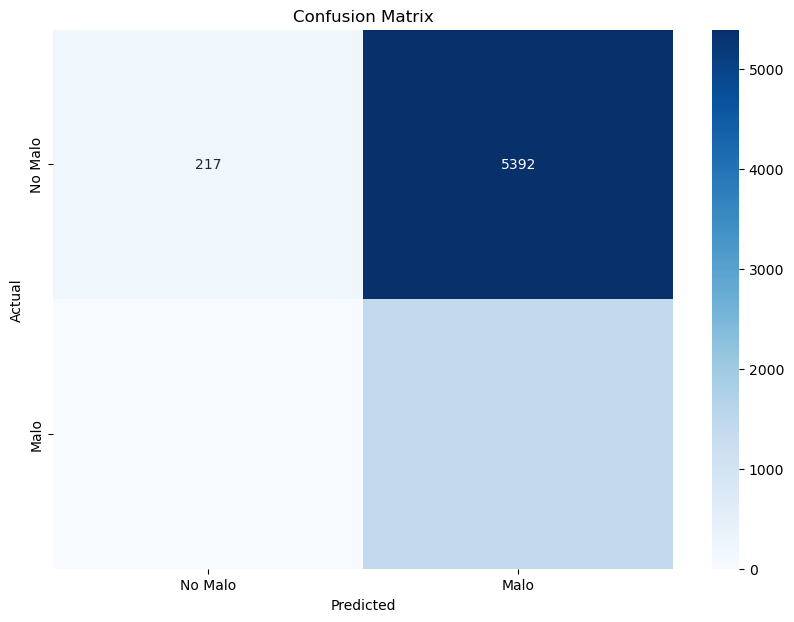

In [57]:
y_pred = model.predict(X_test)
y_probs = model.predict_proba(X_test)[:, 1]
auc_score = roc_auc_score(y_test, y_probs)
acc_score = accuracy_score(y_test, y_pred)
class_report = classification_report(y_test, y_pred, zero_division=0)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"ROC-AUC Score: {auc_score}")
print(f"Accuracy Score: {acc_score}")
print("Classification Report:")
print(class_report)

plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Malo', 'Malo'], yticklabels=['No Malo', 'Malo'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

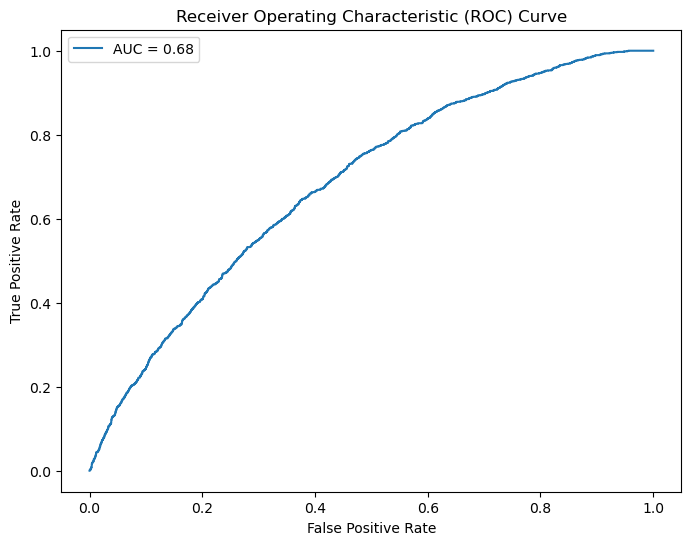

In [58]:
# Calcular la curva ROC y AUC-ROC
from sklearn.metrics import auc
y_probs = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
auc_score = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {auc_score:.2f}')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

**Importancia de las features**

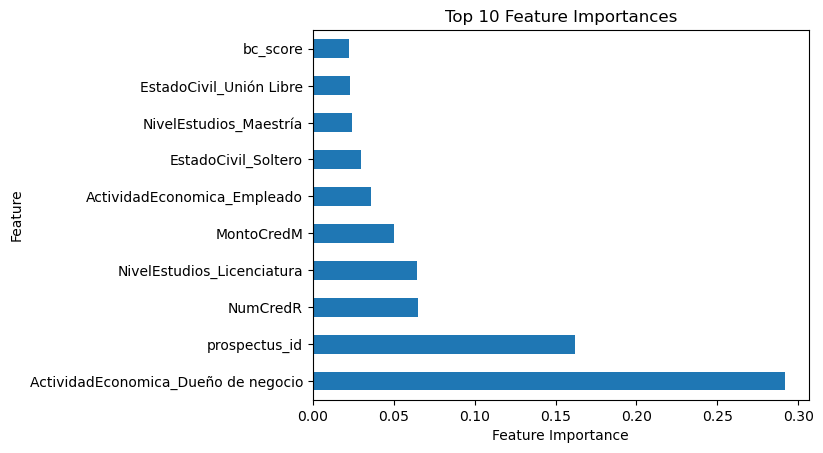

In [60]:
if hasattr(model, 'feature_importances_'):
    feature_importances = pd.Series(model.feature_importances_, index=X.columns)
    feature_importances.nlargest(10).plot(kind='barh')
    plt.title('Top 10 Feature Importances')
    plt.xlabel('Feature Importance')
    plt.ylabel('Feature')
    plt.show()

### Conclusiones

En el presente Notebook probamos distintos modelos alternativos para la data de colocación de crédito de Kubo Financiero. 

Entre los modelos alternativos (algoritmos) que probamos se encuentran: 




**Logistic Regression**  


**Random Forest**  

**Gradient Boosting** 

**Support Vector Machine** 

**K-Nearest Neighbors**  

**Naive Bayes**  

Con lo anterior, los dos mejores modelos encontrados fueron: 

**Random Forest y Gradient Boosting.**

Que cuando aplicamos un gridSearch para optimizar parámetros, encontramos que el mejor de ellos es el Gradient Boosting. 


Con el resultado anterior, lo que decidimos fue aplicar un XGBoost, una optimización del Gradient Boosting, que nos permite penalizar por overfitting, optimizar el cálculo con computo paralelizado, encontrar optimos globales, entre otros. 

Con lo que encontramos un modelo final: 

**XGBoost (eXtreme Gradient Boosting)** con ROC = 69 (que es nuestra métrica de interes)